# HW5

In [1]:
# Common imports
import numpy as np
import pandas as pd
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The LendingClub is a peer-to-peer lending company that directly connects borrowers and 
potential lenders/investors. In this homework, you will build classification models to predict 
whether or not a loan provided by LendingClub is likely to default. 
 
In this homework you will use data from the LendingClub to predict whether a loan will be paid 
off in full or the loan will be charged off and possibly go into default.

# Load the Lending Club dataset 
 
Load the dataset into a data frame named loans.

In [2]:
club = pd.read_csv("lending-club-data.csv")
club.head()

C:\Users\anson\AppData\Local\Temp\ipykernel_30280\1318206147.py:1: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  club = pd.read_csv("lending-club-data.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


### Exploring features 
 
Let's quickly explore what the dataset looks like. First, print out the column names to see what 
features we have in this dataset. Here, we should see that we have some feature columns that 
have to do with grade of the loan, annual income, home ownership status, etc.

In [3]:
club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122607 entries, 0 to 122606
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           122607 non-null  int64  
 1   member_id                    122607 non-null  int64  
 2   loan_amnt                    122607 non-null  int64  
 3   funded_amnt                  122607 non-null  int64  
 4   funded_amnt_inv              122607 non-null  int64  
 5   term                         122607 non-null  object 
 6   int_rate                     122607 non-null  float64
 7   installment                  122607 non-null  float64
 8   grade                        122607 non-null  object 
 9   sub_grade                    122607 non-null  object 
 10  emp_title                    115767 non-null  object 
 11  emp_length                   118516 non-null  object 
 12  home_ownership               122607 non-null  object 
 13 

Features for the classification algorithm 
 
In this assignment, we will be using a subset of features (categorical and numeric). The features 
we will be using are described below. Extract these feature columns and target column from the 
dataset. We will only use these features. 
 
features = [
            
            'grade',                     # grade of the loan 

            'sub_grade',                 # sub-grade of the loan 

            'short_emp',                 # one year or less of employment 

            'emp_length_num',            # number of years of employment 

            'home_ownership',            # home_ownership status: own, mortgage or rent 

            'dti',                       # debt to income ratio 

            'purpose',                   # the purpose of the loan 

            'term',                      # the term of the loan 

            'last_delinq_none',          # has borrower had a delinquincy 

            'last_major_derog_none',     # has borrower had 90 day or worse rating 

            'revol_util',                # percent of available credit being used 

            'total_rec_late_fee',        # total late fees received to day 
           ] 
 
You may skip observations with missing values in these features.

In [4]:
data = club.copy()
data = data[["grade","sub_grade","short_emp","emp_length_num","home_ownership","dti","purpose",
             "term","last_delinq_none","last_major_derog_none","revol_util","total_rec_late_fee",
             "bad_loans"]]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122607 entries, 0 to 122606
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   grade                  122607 non-null  object 
 1   sub_grade              122607 non-null  object 
 2   short_emp              122607 non-null  int64  
 3   emp_length_num         122607 non-null  int64  
 4   home_ownership         122607 non-null  object 
 5   dti                    122607 non-null  float64
 6   purpose                122607 non-null  object 
 7   term                   122607 non-null  object 
 8   last_delinq_none       122607 non-null  int64  
 9   last_major_derog_none  122607 non-null  int64  
 10  revol_util             122607 non-null  float64
 11  total_rec_late_fee     122607 non-null  float64
 12  bad_loans              122607 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 12.2+ MB


In [5]:
data.isna().sum()

grade                    0
sub_grade                0
short_emp                0
emp_length_num           0
home_ownership           0
dti                      0
purpose                  0
term                     0
last_delinq_none         0
last_major_derog_none    0
revol_util               0
total_rec_late_fee       0
bad_loans                0
dtype: int64

### Exploring the target column 
 
The target column (label column) of the dataset that we are interested in is called bad_loans. In 
this column 1 means a risky (bad) loan 0 means a safe loan. 

In [6]:
y = data["bad_loans"]
y

0         0
1         1
2         0
3         0
4         0
         ..
122602    1
122603    0
122604    1
122605    1
122606    0
Name: bad_loans, Length: 122607, dtype: int64

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Now, let us explore the distribution of the target column. This gives us a sense of how many safe 
and risky loans are present in the dataset. Print out the percentage of safe loans and risky loans in 
the data frame. 
 
It looks like most of these loans are safe loans (thankfully). But this does make our problem of 
identifying risky loans challenging. 

In [8]:
# Calculate the percentage using value_counts
frequency_table = y.value_counts(normalize=True).reset_index()
frequency_table.columns = ['Value', 'Percentage']

# Print the table of percentage
print(frequency_table)

   Value  Percentage
0      0    0.811185
1      1    0.188815


<Axes: xlabel='bad_loans'>

Text(0.5, 0, 'Bad Loan')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bad Loan Count Bar Graph')

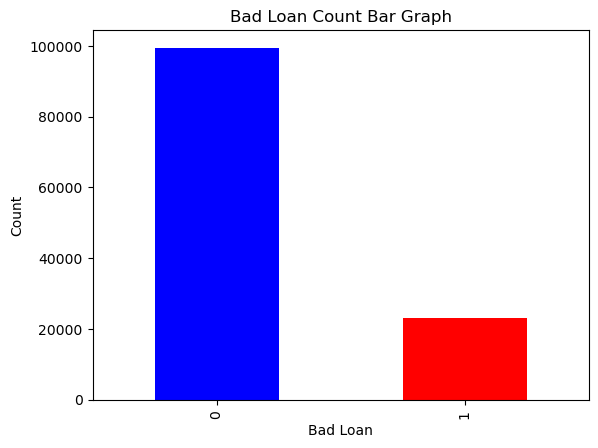

In [9]:
# Plotting a bar graph

y.groupby(y).count().plot(kind='bar', color=['blue', 'red']) 
plt.xlabel('Bad Loan')
plt.ylabel('Count')
plt.title('Bad Loan Count Bar Graph')
plt.show()

### Sample data to balance classes 
 
Our data is disproportionally full of safe loans. Let's create two datasets: one with just the safe 
loans (safe_loans_raw) and one with just the risky loans (risky_loans_raw). 
  
One way to combat class imbalance is to undersample the larger class until the class distribution 
is approximately half and half. Here, we will undersample the larger class (safe loans) in order to 
balance out our dataset. This means we are throwing away many data points. We will use seed=1 
so everyone gets the same results. Use the following codes for this task.  


In [10]:
risky_loans_raw = data[data.bad_loans==1]

In [11]:
risky_loans_raw

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,1
6,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,1
7,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,1
10,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,1
12,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122596,D,D1,0,11,MORTGAGE,19.56,debt_consolidation,36 months,0,1,52.5,0.0,1
122601,B,B5,0,5,MORTGAGE,18.69,debt_consolidation,36 months,0,1,29.5,0.0,1
122602,E,E5,1,0,MORTGAGE,1.50,medical,60 months,0,0,14.6,0.0,1
122604,D,D3,0,6,MORTGAGE,12.28,medical,60 months,0,0,10.7,0.0,1


In [12]:
safe_loans_raw = data[data.bad_loans==0]

In [13]:
safe_loans_raw

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,0
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,0
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,0
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,0
5,E,E1,0,10,RENT,5.35,car,36 months,1,1,87.5,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122598,A,A5,0,3,MORTGAGE,14.60,medical,36 months,1,1,82.7,0.00,0
122599,G,G2,0,11,MORTGAGE,26.27,medical,60 months,0,0,94.1,0.00,0
122600,D,D3,1,1,RENT,6.41,other,36 months,0,1,55.9,0.00,0
122603,D,D2,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,0,15.2,0.00,0


In [14]:
percentage = len(risky_loans_raw)/float(len(safe_loans_raw)) 
 
risky_loans = risky_loans_raw 

safe_loans = safe_loans_raw.sample(frac = percentage, random_state = 1) 
 
# Append the risky_loans with the downsampled version of safe_loans 

loans_data = pd.concat([risky_loans, safe_loans], ignore_index=True)

In [15]:
loans_data[loans_data.bad_loans==1].shape

(23150, 13)

In [16]:
loans_data[loans_data.bad_loans==0].shape

(23150, 13)

### One-hot encoding 
 
For scikit-learn's implementation, it requires numerical values for it's data matrix. This means 
you will have to turn categorical variables into binary features via one-hot encoding.

In [17]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46300 entries, 0 to 46299
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  46300 non-null  object 
 1   sub_grade              46300 non-null  object 
 2   short_emp              46300 non-null  int64  
 3   emp_length_num         46300 non-null  int64  
 4   home_ownership         46300 non-null  object 
 5   dti                    46300 non-null  float64
 6   purpose                46300 non-null  object 
 7   term                   46300 non-null  object 
 8   last_delinq_none       46300 non-null  int64  
 9   last_major_derog_none  46300 non-null  int64  
 10  revol_util             46300 non-null  float64
 11  total_rec_late_fee     46300 non-null  float64
 12  bad_loans              46300 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 4.6+ MB


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

col_cat = ["grade","sub_grade","home_ownership","purpose","term"]


pipe_cat = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessor = make_column_transformer( (pipe_cat,col_cat) )

### Split data into training and validation and test sets 
 
First, split the original data into train-validate set (90%) and test set (10%) using random state = 0.  
Then, split the train-validate set into training set (80%) and validation set (20%) using random 
state = 0. 

In [19]:
from sklearn.model_selection import train_test_split

X = loans_data.drop("bad_loans", axis=1)
y = loans_data["bad_loans"]

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,y_train_val, test_size=0.2, random_state=0)


### Build a decision tree classifier 
 
Build a decision tree classifier with max_depth = 2 or 6 or 10 using the training set.  
Visualize your decision trees.   
 
Compare the accuracy of the three decision tree classifiers using the validation set. Which one is 
the best? Report the best model’s performance on the test set.

When the max depth is: 2


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership', 'purpose',
                                                   'term'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2))])

The validation accuracy on max depth 2: 0.6139


'Max_Depth_2.png'

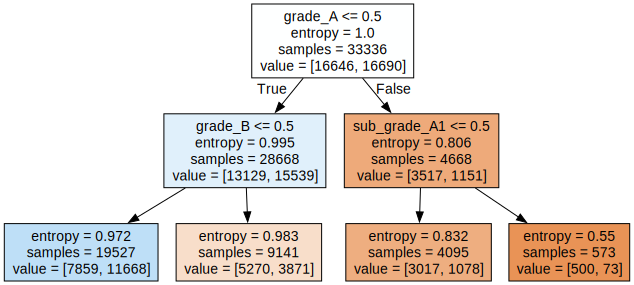

When the max depth is: 6


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership', 'purpose',
                                                   'term'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

The validation accuracy on max depth 6: 0.6140


'Max_Depth_6.png'

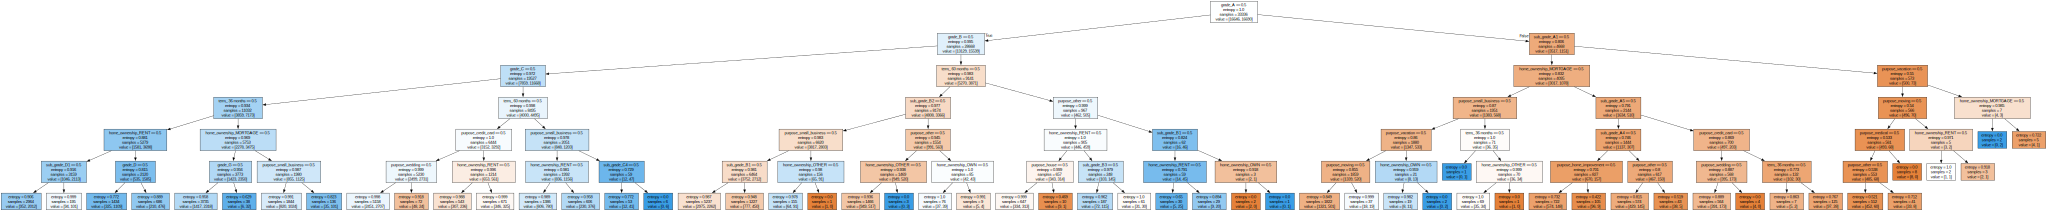

When the max depth is: 10


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership', 'purpose',
                                                   'term'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

The validation accuracy on max depth 10: 0.6163


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.919672 to fit


'Max_Depth_10.png'

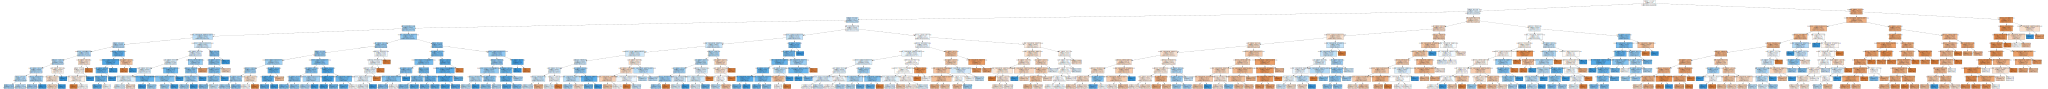

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


param = [2,6,10]
val_score = []
test_score = []
for depth in param:
    print(f"When the max depth is: {depth}")
    tree = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    pipe_tree = make_pipeline(preprocessor,tree)
    pipe_tree.fit(X_train, y_train)
    v_score = pipe_tree.score(X_val,y_val)
    t_score = pipe_tree.score(X_test,y_test)
    print(f"The validation accuracy on max depth {depth}: {v_score:.4f}")
    val_score.append(v_score)
    test_score.append(t_score)
    feature_name = preprocessor.named_transformers_['pipeline'].named_steps['onehotencoder'].get_feature_names_out(input_features=col_cat)
    tree_dot = export_graphviz(tree, out_file=None, feature_names=feature_name, filled=True)
    graph = graphviz.Source(tree_dot, format="png")
    graph.render(filename="Max_Depth_"+str(depth), cleanup=True)
    graph

In [21]:
print(f"The best accuracy using the validation set is \n\
when max depth ={param[val_score.index(max(val_score))]} and the accuracy on test set is {test_score[val_score.index(max(val_score))]:.4f}" )

The best accuracy using the validation set is 
when max depth =10 and the accuracy on test set is 0.6102


### Explore probability predictions 
 
For each row in the validation set, what is the probability (using the best model from the 
previous comparisons) of a loan being classified as safe? (Hint: if you are using scikit-learn, you 
can use the .predict_proba() method) 
 
Which loan has the highest probability of being classified as a safe loan?

In [22]:
tree = DecisionTreeClassifier(max_depth=10, criterion='entropy')
pipe_tree = make_pipeline(preprocessor,tree)
pipe_tree.fit(X_train, y_train)
prob = pipe_tree.predict_proba(X_val)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership', 'purpose',
                                                   'term'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

In [23]:
prob

array([[0.43764302, 0.56235698],
       [0.72740851, 0.27259149],
       [0.53576073, 0.46423927],
       ...,
       [0.325     , 0.675     ],
       [0.88864143, 0.11135857],
       [0.53576073, 0.46423927]])

In [24]:
print(f"The row of validation set: {np.argmax(prob[:, 0])} has the highest probability of being classified as a safe loan")

The row of validation set: 178 has the highest probability of being classified as a safe loan


### Build a SVM classifier 
 
Use 5-fold GridSearchCV on the train-validate set. Build a kernelized SVM classifier 
(preprocessing the data with MinMaxScaler) with rbf kernel and compare hyperparameters in the 
following grid:  
C: np.logspace(-3, 3, 7), gamma: np.logspace(-3, 3, 7) / X_train.shape[0] 
Report the best model’s performance on the test set. 

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

col_num = ["emp_length_num","dti","revol_util","total_rec_late_fee"]

pipe_num = make_pipeline(MinMaxScaler())
preprocessor_svm = make_column_transformer( (pipe_cat,col_cat) , (pipe_num,col_num) )
pipe_svc = make_pipeline(preprocessor_svm, SVC())


np.set_printoptions(precision=6, suppress=True)
param_grid = {'svc__C': np.logspace(-2, 2, 3), 'svc__gamma': np.logspace(-2, 2, 3) / X_train.shape[0]}
param_grid

{'svc__C': array([  0.01,   1.  , 100.  ]),
 'svc__gamma': array([0.     , 0.00003, 0.003  ])}

In [26]:
from sklearn.model_selection import GridSearchCV

grid_svm = GridSearchCV(pipe_svc, param_grid=param_grid, cv=5, return_train_score=True)

grid_svm.fit(X_train_val, y_train_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'purpose',
                                                                          'term']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['emp_length_num',
                                                                          'dti',
                                                                          'revol_util',
                                                                          'total_rec_late_fee'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([  0.01,   1.  , 100.  ]),
                         'svc__gamma': array([0.     , 0.00003, 0.003  ])},
             return_train_score=True)

In [ ]:
grid_svm.best_params_

In [28]:
print(f"The best parameters on validation set is: {grid_svm.best_params_}")
print("accuracy on test set: %f" % grid_svm.score(X_test, y_test))

The best parameters on validation set is: {'svc__C': 100.0, 'svc__gamma': 0.002999760019198464}
accuracy on test set: 0.617279


### Build a random forest classifier 
 
Use 5-fold GridSearchCV on the train-validate set. Build a random forest classifier and compare 
hyperparameters in the following grid:  
max_features: [2, 4, 6, 8, 10], max_depth: [6, 8, 10, 12, 14] 
Report the best model’s performance on the test set

In [29]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(preprocessor, RandomForestClassifier())

np.set_printoptions(precision=6, suppress=True)
param_grid = {'randomforestclassifier__max_features': [2,4,6,8,10],
              'randomforestclassifier__max_depth': [6,8,10,12,14]}
param_grid

{'randomforestclassifier__max_features': [2, 4, 6, 8, 10],
 'randomforestclassifier__max_depth': [6, 8, 10, 12, 14]}

In [30]:
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=5, return_train_score=True)
grid_rf.fit(X_train_val, y_train_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'purpose',
                                                                          'term'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [6, 8, 10, 12,
                                                               14],
                         'randomforestclassifier__max_features': [2, 4, 6, 8,
                                                                  10]},
             return_train_score=True)

In [31]:
print(f"The best parameters on validation set is: {grid_rf.best_params_}")
print("accuracy on test set: %f" % grid_rf.score(X_test, y_test))

The best parameters on validation set is: {'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_features': 4}
accuracy on test set: 0.619222


### Build a gradient boosting classifier 
 
Use 5-fold GridSearchCV on the train-validate set. Build a gradient boosted tree classifier (fixing 
max_depth = 6) and compare hyperparameters in the following grid:  
learning_rate: np.logspace(-2, 0, 3), n_estimators: [5, 10, 50, 100, 200, 500] 
Report the best model’s performance on the test set. 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = make_pipeline(preprocessor, GradientBoostingClassifier(max_depth=6))

np.set_printoptions(precision=6, suppress=True)
param_grid = {'gradientboostingclassifier__learning_rate': np.logspace(-2, 0, 3),
              'gradientboostingclassifier__n_estimators': [5, 10, 50, 100, 200, 500]}
param_grid

{'gradientboostingclassifier__learning_rate': array([0.01, 0.1 , 1.  ]),
 'gradientboostingclassifier__n_estimators': [5, 10, 50, 100, 200, 500]}

In [33]:
grid_gb = GridSearchCV(pipe_gb, param_grid=param_grid, cv=5, return_train_score=True)
grid_gb.fit(X_train_val, y_train_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'purpose',
                                                                          'term'])])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(max_depth=6))]),
             param_grid={'gradientboostingclassifier__learning_rate': array([0.01, 0.1 , 1.  ]),
                         'gradientboostingclassifier__n_estimators': [5, 10, 50,
                                                                      100, 200,
                                                                      500]},
             return_train_score=True)

In [34]:
print(f"The best parameters on validation set is: {grid_gb.best_params_}")
print("accuracy on test set: %f" % grid_gb.score(X_test, y_test))

The best parameters on validation set is: {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 500}
accuracy on test set: 0.611663


### XGBoost, LightGBM, and CatBoost 
 
Try XGBoost, LightGBM, and CatBoost and see if you can get further improvement. 
Report the best model’s performance on the test set.

In [35]:
from xgboost import XGBClassifier

pipe_xgb = make_pipeline(preprocessor, XGBClassifier())
pipe_xgb.fit(X_train_val, y_train_val)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership', 'purpose',
                                                   'term'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [36]:
print("accuracy on training set: %f" % pipe_xgb.score(X_train_val, y_train_val))
print("accuracy on test set: %f" % pipe_xgb.score(X_test, y_test))

accuracy on training set: 0.632421
accuracy on test set: 0.610583


In [37]:
from lightgbm import LGBMClassifier

pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier())
pipe_lgbm.fit(X_train_val, y_train_val)

[LightGBM] [Info] Number of positive: 20857, number of negative: 20813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 41670, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500528 -> initscore=0.002112
[LightGBM] [Info] Start training from score 0.002112


c:\Users\anson\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系統找不到指定的檔案。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anson\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\anson\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anson\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\anson\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
       

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership', 'purpose',
                                                   'term'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [38]:
print("accuracy on training set: %f" % pipe_lgbm.score(X_train_val, y_train_val))
print("accuracy on test set: %f" % pipe_lgbm.score(X_test, y_test))

accuracy on training set: 0.629326
accuracy on test set: 0.612527


In [39]:
from catboost import CatBoostClassifier

pipe_catb = make_pipeline(preprocessor, CatBoostClassifier())
pipe_catb.fit(X_train_val, y_train_val)

Learning rate set to 0.050652
0:	learn: 0.6887391	total: 161ms	remaining: 2m 40s
1:	learn: 0.6847272	total: 168ms	remaining: 1m 23s
2:	learn: 0.6811640	total: 174ms	remaining: 57.7s
3:	learn: 0.6779767	total: 180ms	remaining: 44.8s
4:	learn: 0.6750499	total: 185ms	remaining: 36.8s
5:	learn: 0.6727883	total: 190ms	remaining: 31.4s
6:	learn: 0.6703907	total: 196ms	remaining: 27.8s
7:	learn: 0.6682853	total: 202ms	remaining: 25s
8:	learn: 0.6662654	total: 208ms	remaining: 22.9s
9:	learn: 0.6646474	total: 213ms	remaining: 21.1s
10:	learn: 0.6630947	total: 219ms	remaining: 19.7s
11:	learn: 0.6617567	total: 225ms	remaining: 18.5s
12:	learn: 0.6605033	total: 231ms	remaining: 17.5s
13:	learn: 0.6593519	total: 236ms	remaining: 16.6s
14:	learn: 0.6583126	total: 242ms	remaining: 15.9s
15:	learn: 0.6572927	total: 247ms	remaining: 15.2s
16:	learn: 0.6564459	total: 254ms	remaining: 14.7s
17:	learn: 0.6557140	total: 260ms	remaining: 14.2s
18:	learn: 0.6551001	total: 265ms	remaining: 13.7s
19:	learn: 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership', 'purpose',
                                                   'term'])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000002053D1BB0D0>)])

In [40]:
print("accuracy on training set: %f" % pipe_catb.score(X_train_val, y_train_val))
print("accuracy on test set: %f" % pipe_catb.score(X_test, y_test))

accuracy on training set: 0.634389
accuracy on test set: 0.610799


### Final Evaluation 
 
After all the comparisons, which model will you select?

### Confusion matrix and f1 score

In [58]:
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

In [68]:
pd.DataFrame(confusion_matrix(y_test,pipe_tree.predict(X_test)))
print(f"The f1 score of decision tree with depth = 10 is {met.f1_score(y_test,pipe_tree.predict(X_test)):.4f}")

,0,1
0,1399,938
1,866,1427


The f1 score of decision tree with depth = 10 is 0.6127


In [70]:
pd.DataFrame(confusion_matrix(y_test,grid_svm.predict(X_test)))
print(f"The f1 score of SVM with depth =10 is {met.f1_score(y_test,grid_svm.predict(X_test)):.4f}")

,0,1
0,1390,947
1,825,1468


The f1 score of SVM with depth =10 is 0.6236


In [72]:
pd.DataFrame(confusion_matrix(y_test,grid_rf.predict(X_test)))
print(f"The f1 score of the best random forest is {met.f1_score(y_test,grid_rf.predict(X_test)):.4f}")

,0,1
0,1403,934
1,829,1464


The f1 score of the best random forest is 0.6242


In [73]:
pd.DataFrame(confusion_matrix(y_test,grid_gb.predict(X_test)))
print(f"The f1 score of the best gradient boosting is {met.f1_score(y_test,grid_gb.predict(X_test)):.4f}")

,0,1
0,1335,1002
1,796,1497


The f1 score of the best gradient boosting is 0.6248


In [74]:
pd.DataFrame(confusion_matrix(y_test,pipe_xgb.predict(X_test)))
print(f"The f1 score of the best xgboosting is {met.f1_score(y_test,pipe_xgb.predict(X_test)):.4f}")

,0,1
0,1347,990
1,813,1480


The f1 score of the best xgboosting is 0.6215


In [75]:
pd.DataFrame(confusion_matrix(y_test,pipe_lgbm.predict(X_test)))
print(f"The f1 score of the best light gbm is {met.f1_score(y_test,pipe_lgbm.predict(X_test)):.4f}")

,0,1
0,1346,991
1,803,1490


The f1 score of the best light gbm is 0.6242


In [76]:
pd.DataFrame(confusion_matrix(y_test,pipe_catb.predict(X_test)))
print(f"The f1 score of the best catboosting is {met.f1_score(y_test,pipe_catb.predict(X_test)):.4f}")

,0,1
0,1346,991
1,811,1482


The f1 score of the best catboosting is 0.6219


### ROC and AUC

Text(0.5, 1.0, 'Decision Tree with depth = 10 model ROC and AUC')

Text(0.5, 1.0, 'Best SVM model ROC and AUC')

Text(0.5, 1.0, 'Best RandomForest model ROC and AUC')

Text(0.5, 1.0, 'Best Grandient Boosting model ROC and AUC')

Text(0.5, 1.0, 'XGBoost model ROC and AUC')

Text(0.5, 1.0, 'LightGBMmodel ROC and AUC')

Text(0.5, 1.0, 'CatBoost model ROC and AUC')

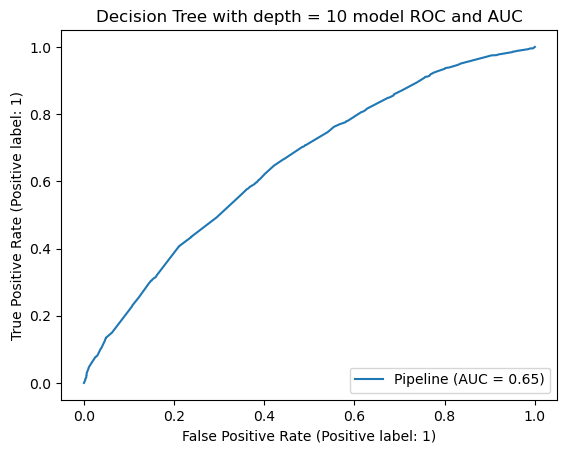

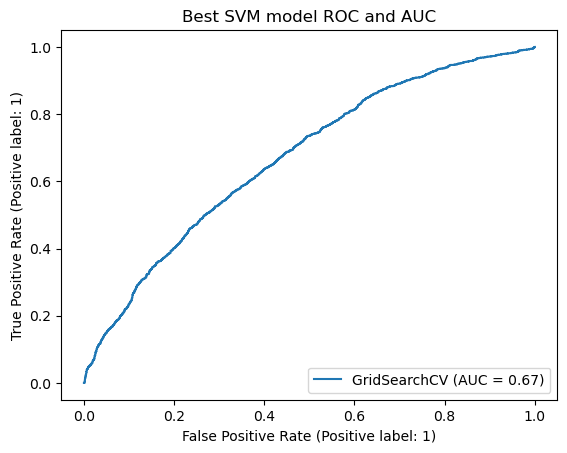

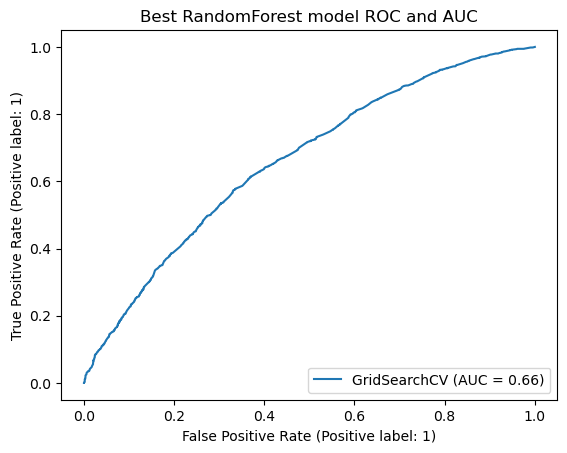

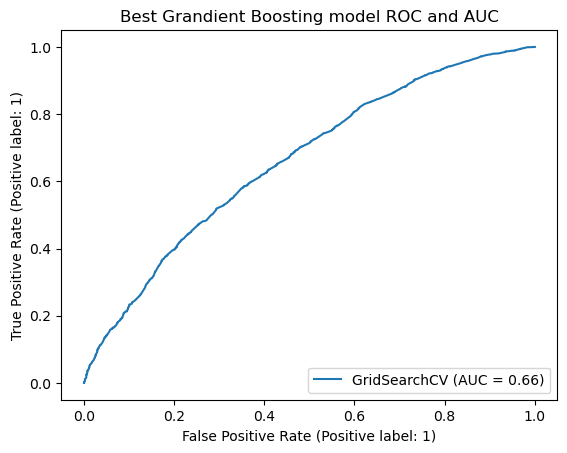

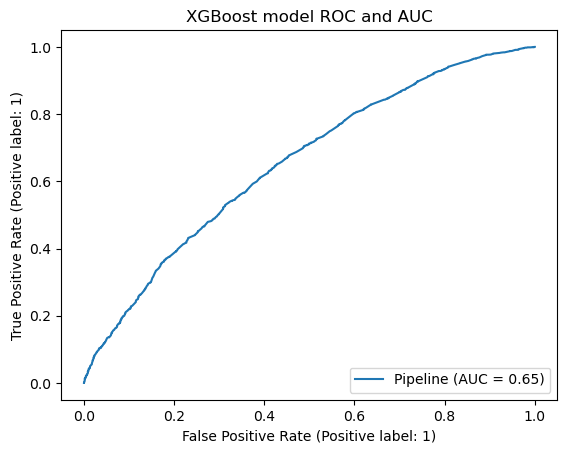

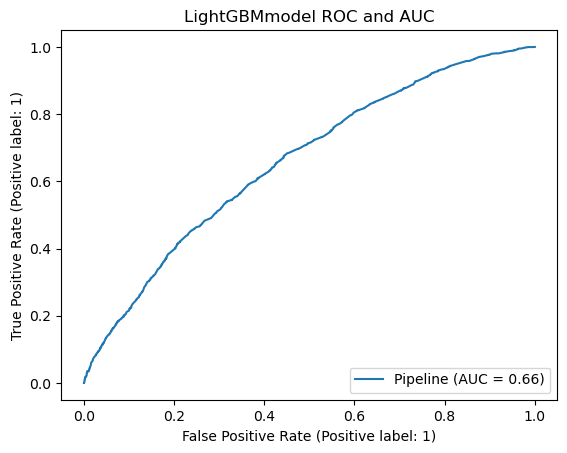

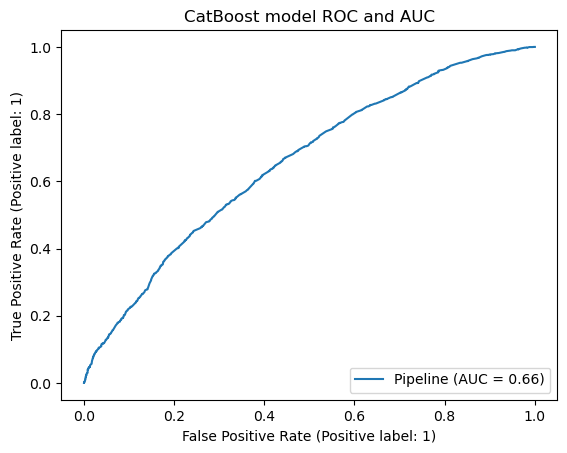

In [69]:
# Compute ROC curves
met.RocCurveDisplay.from_estimator(pipe_tree, X_test,y_test)
plt.title("Decision Tree with depth = 10 model ROC and AUC")
met.RocCurveDisplay.from_estimator(grid_svm, X_test,y_test)
plt.title("Best SVM model ROC and AUC")
met.RocCurveDisplay.from_estimator(grid_rf, X_test,y_test)
plt.title("Best RandomForest model ROC and AUC")
met.RocCurveDisplay.from_estimator(grid_gb, X_test,y_test)
plt.title("Best Grandient Boosting model ROC and AUC")
met.RocCurveDisplay.from_estimator(pipe_xgb, X_test,y_test)
plt.title("XGBoost model ROC and AUC")
met.RocCurveDisplay.from_estimator(pipe_lgbm, X_test,y_test)
plt.title("LightGBMmodel ROC and AUC")
met.RocCurveDisplay.from_estimator(pipe_catb, X_test,y_test)
plt.title("CatBoost model ROC and AUC")

Conclusion:

From the confusion matrix, we notice that there are all balance in risky and safe but it is because we had done the 50-50 data segregation.

By comparing the f1 score, gradient boosting has the highest score.

By comparing the AUC, SVM has the highest area under the ROC plot.

SVM and gradient boosting are the two model I will select for this dataset.